In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import xml.etree.ElementTree as ET
import random
import os
import shutil

In [15]:
path_to_img = 'images_subset/'

filelist= [file for file in os.listdir(path_to_img) if file.endswith('.png')]
filename = [name[:-4] for name in filelist]

In [16]:
base_dir = os.getcwd() #/Satellite_Pool_Detection
sub_dir = base_dir + '/remove_images/'
!mkdir {sub_dir}

mkdir: /Users/rurikoimai/Documents/GitHub/Satellite_Pool_Detection/remove_images/: File exists


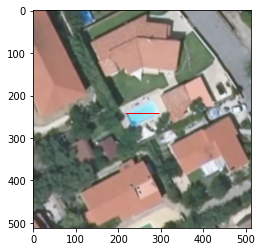

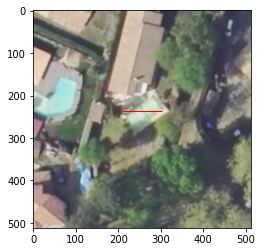

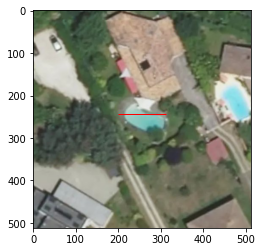

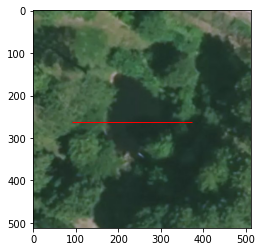

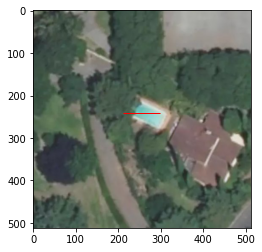

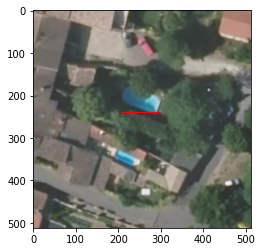

In [17]:
# Check data values 
#error: https://stackoverflow.com/questions/62075321/tensorflow-python-framework-errors-impl-invalidargumenterror-invalid-argument
# first check if the xmin, ymin, xmax, ymax all are within the image's resolution and they are not negatives.
# Also check the width and height are positives.
#check if area is 0

check_files = []

for idx, file in enumerate(filename):
    im = Image.open(path_to_img + file + '.png')
    tree = ET.parse(path_to_img + file + '.xml')
    root = tree.getroot()
    xmin = int(root.find("object").find("bndbox").find("xmin").text)
    ymin = int(root.find("object").find("bndbox").find("ymin").text)
    xmax = int(root.find("object").find("bndbox").find("xmax").text)
    ymax = int(root.find("object").find("bndbox").find("ymax").text)
    
    width = xmax - xmin
    height = ymax - ymin
    
    if width == 0 or height ==0:
        # Append file to check_files
        check_files.append(file)
        
        # Create figure and axes
        fig, ax = plt.subplots()

        # Display the image
        ax.imshow(im)

        # Create a Rectangle patch
        # rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')
        rect = patches.Rectangle((xmin,ymax), width, -height, linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

        plt.show()
    
    
#     if xmin > 0 & xmin < 520 & xmax > 0 & xmax < 520 & ymin > 0 & ymin < 520 & ymax > 0 & ymax < 520:
#         pass
#     elif xmin == 0 or xmin == 520 or xmax == 0 or xmax == 520 or ymin == 0 or ymin == 520 or ymax == 0 or ymin==0:
# #         print(f'xmin: {xmin}')
# #         print(f'xmax: {xmax}')
# #         print(f'ymin: {ymin}')
# #         print(f'ymax: {ymax}')
# #         print(file)
#         check_files.append(file)
#     else:
#         print(file)
#         check_files.append(file)

In [ ]:
# ########### ADDITIONAL CHECKS START HERE ###################

# xmn = row['xmin'] / width
# if xmn < 0.0:
#     xmn = 0.0
# elif xmn > 1.0:
#     xmn = 1.0
# xmins.append(xmn)

# xmx = row['xmax'] / width
# if xmx < 0.0:
#     xmx = 0.0
# elif xmx > 1.0:
#     xmx = 1.0
# xmaxs.append(xmx)

# ymn = row['ymin'] / height
# if ymn < 0.0:
#     ymn = 0.0
# elif ymn > 1.0:
#     ymn = 1.0
# ymins.append(ymn)

# ymx = row['ymax'] / height
# if ymx < 0.0:
#     ymx = 0.0
# elif ymx > 1.0:
#     ymx = 1.0
# ymaxs.append(ymx)

# ############ ADDITIONAL CHECKS END HERE ####################

In [19]:
# move images to subfolder
for file in check_files:
    png = '/' + path_to_img + file + '.png'
    xml = '/' + path_to_img + file + '.xml'
    shutil.move(base_dir + png, sub_dir + file + '.png')
    shutil.move(base_dir + xml, sub_dir + file + '.xml')
    try:
        shutil.move(base_dir + png, sub_dir + file + '.png')
        shutil.move(base_dir + xml, sub_dir + file + '.xml')
    except FileNotFoundError:
        print(f'No file found: {file}')

No file found: 42.7776133_2.8398053
No file found: 44.7558117_-1.0755282
No file found: 43.5642586_1.3305893
No file found: 43.7617756_-1.3116182
No file found: 43.5688947_1.398829
No file found: 43.7835235_1.3596322


In [ ]:

# os.rename("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
# os.replace("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
# shutil.move("path/to/current/file.foo", "path/to/new/destination/for/file.foo")

In [ ]:
#if all the pools are in the middle, will the algorithm just predict the middle of the picture?